In [1]:
biotop_file = '../src/net/out.csv'


In [16]:
import csv
import numpy as np

percentage = np.zeros(644)
nPatches = np.zeros(644)
bio = {}


with open(biotop_file, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    
    for row in csv_reader:
        elements = row['Biotop;percentage;nPatches;']
        elements = elements.split(";")
        bio[line_count] = elements[0]
        percentage[line_count] = elements[1]
        nPatches[line_count] = elements[2]
        line_count = line_count +1

        


## Histogram of Biotope degeneration distribution

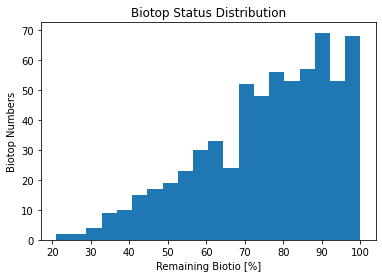

In [34]:
import matplotlib.pyplot as plt

_ = plt.hist([percentage], bins=20)  # arguments are passed to np.histogram
plt.title("Biotop Status Distribution")
plt.ylabel("Biotop Numbers")
plt.xlabel("Remaining Biotio [%]")

plt.show()

### Get all biotopes unter x %

In [33]:
percent_threshold = 30

threshold_index = np.argwhere(percentage < percent_threshold)


for i in threshold_index:
    print(bio[i[0]], percentage[i[0]], "% (", nPatches[i[0]], "Patches)")

bio_563010091 28.0 % ( 25.0 Patches)
bio_565491568 29.0 % ( 61.0 Patches)
bio_563040046 27.0 % ( 47.0 Patches)
bio_564110152 21.0 % ( 19.0 Patches)
bio_564080116 29.0 % ( 24.0 Patches)
bio_564060247 22.0 % ( 9.0 Patches)


## Development of biotope degeneration (for maschine learning analysis)

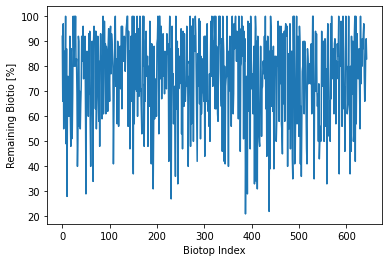

In [6]:
import matplotlib.pyplot as plt

plt.plot(percentage)
plt.xlabel("Biotop Index")
plt.ylabel("Remaining Biotio [%]")
plt.show()

# Read biotope text files

## Get surface of target_biotop

In [15]:
import os
biotop_directory = '../data/output_biotop_dir/'
target_biotop = '563010062'

def getBioInfo(target_txt):
    file = open(target_txt,"r")
    return file
 
def getSurface(file):
    # returns surface in m^2 of biotope(file)
    for i,line in enumerate(file):
        if i == 11:
            return line[28:34]
            
    

folder_path = [x[0] for x in os.walk(biotop_directory)]
target_dir = "\n".join(s for s in folder_path if target_biotop.lower() in s.lower())
target_txt = target_dir+"/"+target_biotop+"_info.txt"

info_file = getBioInfo(target_txt)
surface = getSurface(info_file)
print("Surface of Biotope", target_biotop, ":", surface, "m2")


Surface of Biotope 563010062 : 2999.7 m2


## Get surface of all target_biotop

In [35]:
import os
biotop_directory = '../data/output_biotop_dir/'
A = 0
for i, current_folder in enumerate(folder_path):
    if i != 0:
        current_txt = current_folder+"/"+current_folder[30:]+"_info.txt"
        info_file = getBioInfo(current_txt)
        temp_A = float(getSurface(info_file))
        A = A+temp_A

print(round(A,2), "m2")
print(round(A/1000000,2), "km2")
        

1060659.72 m2
1.06 km2


In [36]:
foot = 7.140 #m²

In [40]:
print(round(A/foot))

148552
